* [Dealing with Outliers](#Dealing-with-Outliers)
    * [Boston Dataset](#Sklearn-Boston-Data)
        * [Discovering outliers with Visulaization](#Discovering-outliers-with-Visulaization:)  
            - [Uni-variance analysis](#1.-Uni-variance-analysis)  
            - [Multi-variance analysis](#2.-Multi-variance-analysis)
        * [Discovering outliers with mathematical functions](#Discovering-outliers-with-mathematical-functions:)
            - [Z-score](#1.-Z-score)
            - [IQR-score](#2.-IQR-score)
    * [AMES Dataset](#Ames-Data)
        * [Finding outliers with Visualization](#Finding-outliers-with-Visualization)
        * [Finding outliers with Mathematical Methods](#Mathematical-Approach)
        * [Saving](#Saving-edited-dataset)  
---
* [Dealing with Missing Data](#Dealing-with-Missing-Data)
    * [Imputation of Missing Data](#Imputation-of-Missing-Data)
        * [Transform function](#Transform-function)
    * [Saving](#saving-data)
---
* [Dealing with Categorical Data](#Dealing-with-Categorical-Data)
---

***  

# Dealing with Outliers

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Sklearn Boston Data

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

C:\Users\rafes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [4]:
x = boston.data
y = boston.target
columns = boston.feature_names

In [5]:
df = pd.DataFrame(x, columns=columns)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Discovering outliers with *Visulaization*:

### 1. Uni-variance analysis
could be done with **Boxplot**:

<AxesSubplot:xlabel='DIS'>

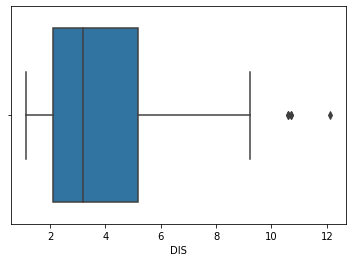

In [7]:
sns.boxplot(data=df, x=df['DIS'])

### 2. Multi-variance analysis
could be done with **scatterplot**:

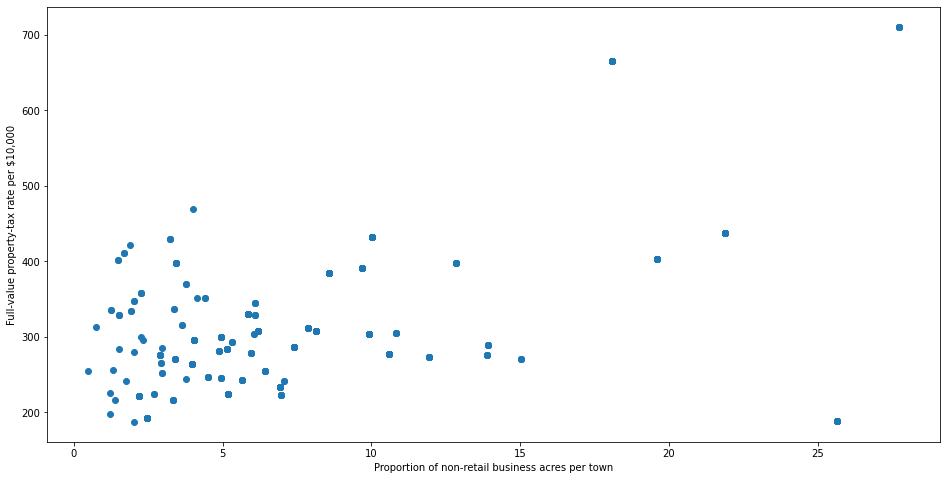

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['INDUS'], df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

## Discovering outliers with *mathematical functions*:

### 1. Z-score  
Wikipedia Definition
> The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

z = scaler.fit_transform(df)

z = pd.DataFrame(z, columns=columns)
z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [11]:
z[z['DIS'] > 3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
351,-0.411266,2.087452,-1.378373,-0.272599,-1.241285,0.419371,-1.161938,3.287300,-0.637962,0.016409,-0.071913,0.154663,-1.004074
352,-0.412087,2.087452,-1.378373,-0.272599,-1.241285,-0.570767,-1.780692,3.287300,-0.637962,0.016409,-0.071913,0.390945,-0.681674
353,-0.418529,3.375039,-1.330223,-0.272599,-1.249924,0.631645,-1.154826,3.960518,-0.523001,-1.313990,-0.672984,0.304655,-1.142846
354,-0.415512,2.945843,-1.346273,-0.272599,-1.224009,-0.885617,-1.659786,3.228069,-0.637962,-0.440915,1.638828,0.286454,-0.645229
355,-0.408113,2.945843,-1.346273,-0.272599,-1.224009,-0.496685,-1.745132,3.228069,-0.637962,-0.440915,1.638828,0.212335,-0.992860


In [12]:
# detecting every row which has an outlier 

# first array is row index 
# second array is column index

np.where(abs(z) > 3)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 1

Alternative way using **scipy:**

In [13]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))

In [14]:
np.where(z > 3)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 1

Data without outliers would be like this:

In [15]:
df[(z < 3).all(axis=1)].shape

(415, 13)

In [16]:
df.shape

(506, 13)

### 2. IQR score
Wikipedia Definition
> The interquartile range (IQR), also called the **midspread** or **middle 50%**, or technically **H-spread**, is a measure of statistical dispersion, being equal to the difference between *75th and 25th* percentiles, or between upper and lower quartiles, **IQR = Q3 − Q1** .  
 In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.  
It is a measure of the dispersion similar to standard deviation or variance, but is much more **robust against outliers**.

Boxplot uses this method for showing the outliers

In [17]:
df = pd.DataFrame(x, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1 
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

In [19]:
df[(df['DIS'] > Q3['DIS'] + (1.5*IQR['DIS'])) | (df['DIS'] < Q1['DIS'] - (1.5*IQR['DIS']))]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57


Data without outliers would be like this:

In [20]:
df[~((df > Q3 + (1.5*IQR))|(df < Q1 - (1.5*IQR))).any(axis=1)].shape

(274, 13)

---
### Ames Data

In [21]:
df = pd.read_csv('../DATA/Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [23]:
plt.figure(figsize=(10,9))
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<Figure size 720x648 with 0 Axes>

### Finding outliers with Visualization

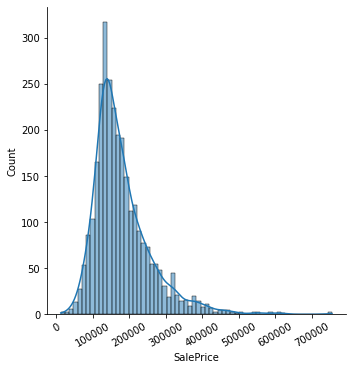

In [24]:
sns.displot(df['SalePrice'], kde=True)
plt.xticks(rotation=30);

<AxesSubplot:xlabel='SalePrice'>

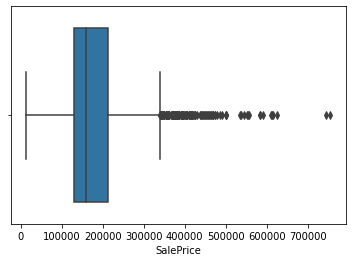

In [25]:
sns.boxplot(x=df['SalePrice'])

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

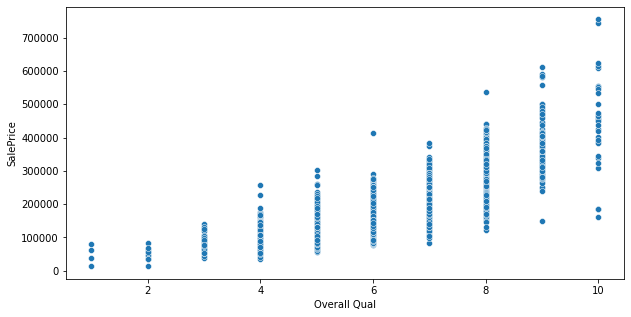

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y='SalePrice', x='Overall Qual')

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

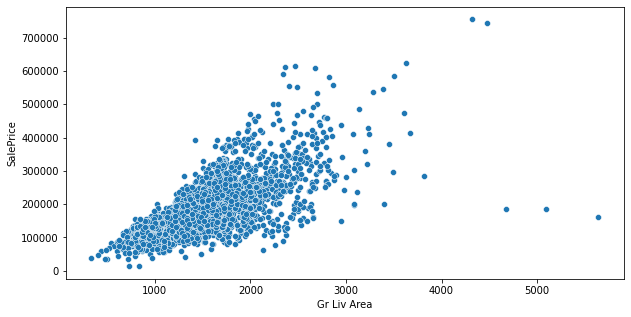

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x= 'Gr Liv Area', y= 'SalePrice')

It seems to be 3 outliers are in our data  
lets find them 

In [28]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice'] <300000)][['Gr Liv Area','Overall Qual', 'SalePrice']]

,Gr Liv Area,Overall Qual,SalePrice
1498,5642,10,160000
2180,5095,10,183850
2181,4676,10,184750


It seems pretty good if we drop those points, bcz 2 of them are also outliers in the first scatter plot 

In [29]:
d_index = df[(df['Gr Liv Area']>4000) & (df['SalePrice'] <300000)].index

In [30]:
df = df.drop(d_index , axis=0)

In [31]:
df[(df['SalePrice'].between(350000,450000)) & (df['Overall Qual'] ==6)][['Gr Liv Area','Overall Qual', 'SalePrice']]

,Gr Liv Area,Overall Qual,SalePrice
2737,3672,6,415000


It doesnt seem to be an outlier, bcz it's not outlier in both plots

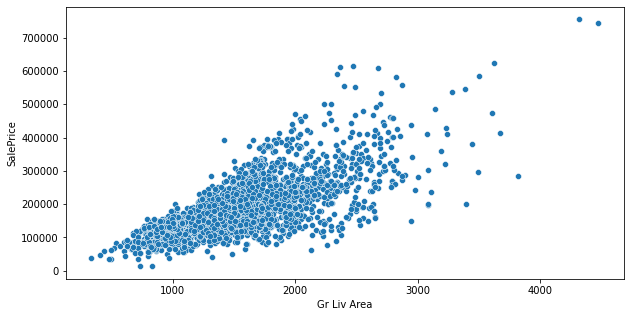

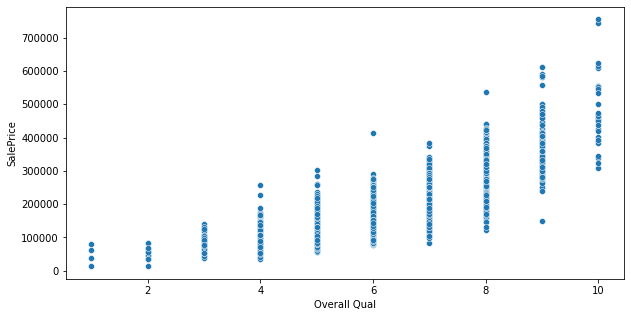

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x= 'Gr Liv Area', y= 'SalePrice')
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y='SalePrice', x='Overall Qual');

It looks great now  
***
### Mathematical Approach
Now, how about ***mathematical methods***

In [33]:
np.where(abs(scaler.fit_transform(df[['SalePrice']]))>3)

(array([  15,   44,   46,  366,  421,  422,  423,  431,  432,  433,  448,
         456,  513,  968, 1051, 1053, 1059, 1063, 1067, 1425, 1636, 1640,
        1641, 1690, 1692, 1694, 1698, 1700, 1759, 1762, 1766, 1771, 2096,
        2326, 2327, 2329, 2331, 2333, 2338, 2379, 2397, 2442, 2447, 2453,
        2663], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0], dtype=int64))

In [34]:
sub_df = df.iloc[np.where(abs(scaler.fit_transform(df[['SalePrice']]))>3)[0]][['Gr Liv Area','Overall Qual', 'SalePrice']]

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

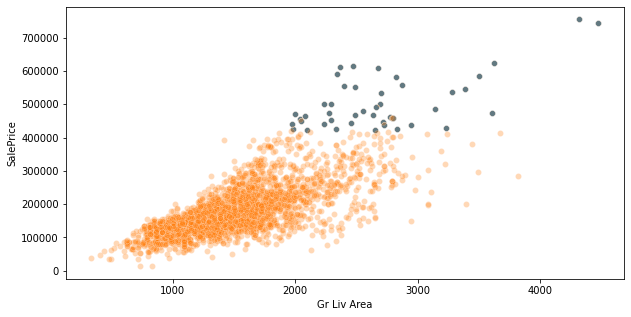

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=sub_df, x='Gr Liv Area', y= 'SalePrice')
sns.scatterplot(data=df, x= 'Gr Liv Area', y= 'SalePrice', alpha=0.3)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

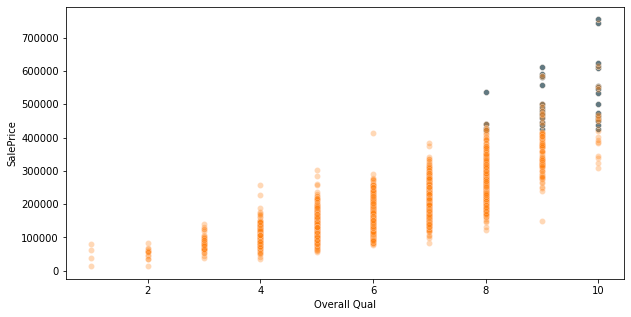

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=sub_df, x='Overall Qual', y= 'SalePrice')
sns.scatterplot(data=df, x= 'Overall Qual', y= 'SalePrice', alpha=0.3)

No These points doesnt seem to be outliers imo. 


### Saving edited dataset

In [37]:
df.to_csv('my_AMES_outlier_removed.csv', index=False)

---


# Dealing with Missing Data 

Descriprion of the Ames Dataset

In [38]:
with open('../DATA/Ames_Housing_Feature_Description.txt', mode='r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [39]:
df = pd.read_csv('my_AMES_outlier_removed.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

Defining a function for percentage of missing data

In [41]:
df.isna().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [42]:
def perc_missing(df):
    column = df.isna().sum() * 100 / len(df)
    return column[column > 0].sort_values()

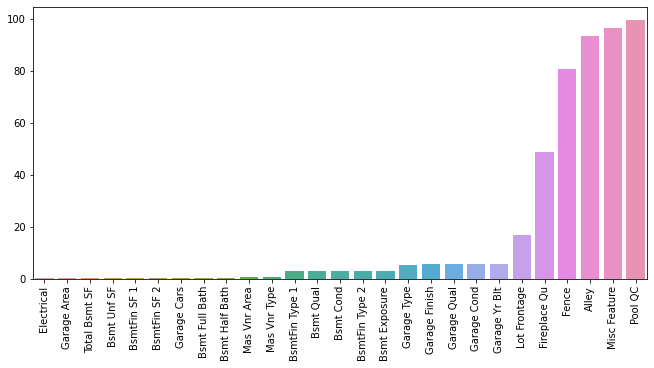

In [43]:
plt.figure(figsize=(11,5))
sns.barplot(x=perc_missing(df).index, y = perc_missing(df))
plt.xticks(rotation=90);

Lets now deal with low missing values in columns. As we have a description on our dataset it would be better if try not to delete those NA values

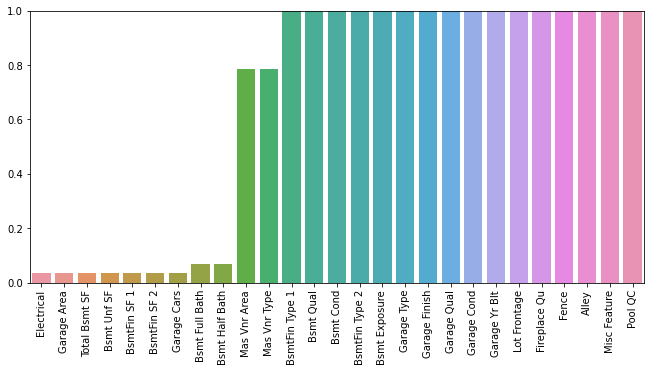

In [44]:
plt.figure(figsize=(11,5))
sns.barplot(x=perc_missing(df).index, y = perc_missing(df))
plt.ylim(0,1)
plt.xticks(rotation=90);

Lets work on Basement columns which are 2 types: **numerical** and **string descriptives**

from info()
> ` 31  Bsmt Qual__2847 non-null__object  
 32  Bsmt Cond__2847 non-null__object   
 33  Bsmt Exposure__2844 non-null__object   
 34  BsmtFin Type 1__2847 non-null__object   
 35  BsmtFin SF 1__2926 non-null__float64  
 36  BsmtFin Type 2__2846 non-null__object   
 37  BsmtFin SF 2__2926 non-null__float64  
 38  Bsmt Unf SF__2926 non-null__float64  
 39  Total Bsmt SF__2926 non-null__float64    
 48  Bsmt Full Bath__2925 non-null__float64  
 49  Bsmt Half Bath__2925 non-null__float64`

for string descriptives:
>  `NA	No Basement`  

for numerical one bcz there is an **unfinished** basement we should set `NA` to 0

In [45]:
bsmt_str = ['Bsmt Qual', 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2']
bsmt_num = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

In [46]:
df[bsmt_str] = df[bsmt_str].fillna('None')

In [47]:
df[bsmt_num] = df[bsmt_num].fillna(0)

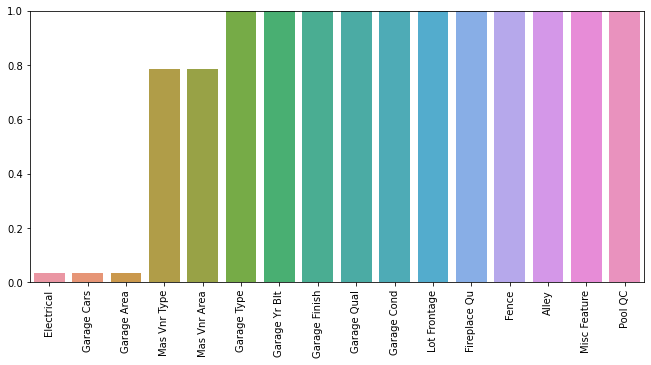

In [48]:
plt.figure(figsize=(11,5))
sns.barplot(x=perc_missing(df).index, y = perc_missing(df))
plt.ylim(0,1)
plt.xticks(rotation=90);

for Garage columns:
> GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet

In [49]:
df[df['Garage Area'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [50]:
df[df['Garage Cars'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [51]:
df[['Garage Cars', 'Garage Area']] = df[['Garage Cars', 'Garage Area']].fillna(0)

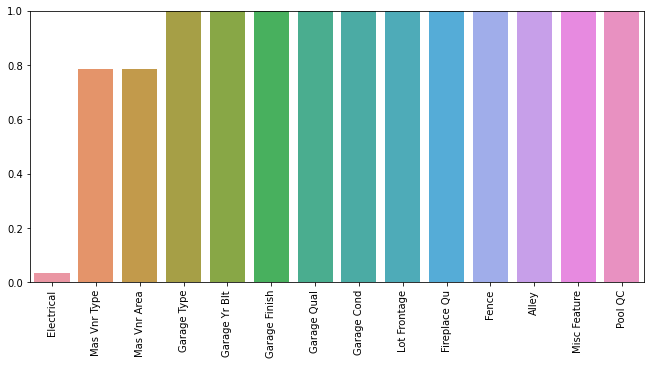

In [52]:
plt.figure(figsize=(11,5))
sns.barplot(x=perc_missing(df).index, y = perc_missing(df))
plt.ylim(0,1)
plt.xticks(rotation=90);

I will delete the electrical missing row 

In [53]:
df = df.drop(df[df['Electrical'].isnull()].index, axis=0)

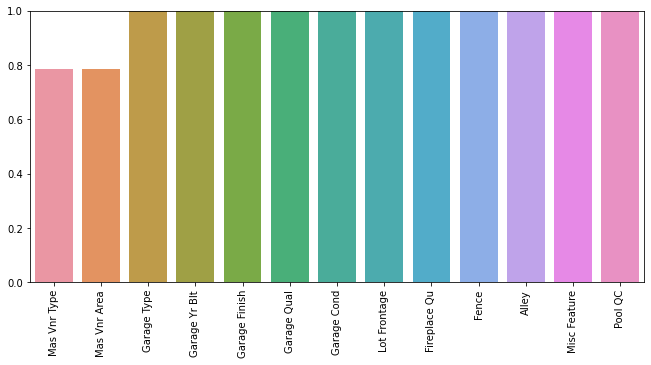

In [54]:
plt.figure(figsize=(11,5))
sns.barplot(x=perc_missing(df).index, y = perc_missing(df))
plt.ylim(0,1)
plt.xticks(rotation=90);

for Mas Vnr(masonry veneer):
> MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
       
>MasVnrArea: Masonry veneer area in square feet  

It seems like that for missing data the house may not have masonry veneer

In [55]:
df[df['Mas Vnr Type'].isnull()][['Mas Vnr Area', 'Mas Vnr Type']]

,Mas Vnr Area,Mas Vnr Type
55,NaN,NaN
484,NaN,NaN
517,NaN,NaN
538,NaN,NaN
867,NaN,NaN
1095,NaN,NaN
1119,NaN,NaN
1122,NaN,NaN
1127,NaN,NaN
1184,NaN,NaN


In [56]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

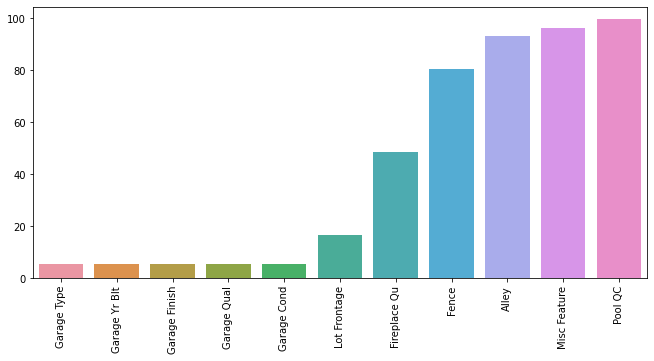

In [57]:
plt.figure(figsize=(11,5))
sns.barplot(x=perc_missing(df).index, y = perc_missing(df))
# plt.ylim(0,1)
plt.xticks(rotation=90);

Now lets explore what are the missing values in *Garage* columns

> `NA	No Garage`

and we can also intuitively use 0 for numerical one

In [58]:
df['Garage Type'].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', nan, 'CarPort', '2Types'],
      dtype=object)

In [59]:
df[['Garage Type', 'Garage Qual', 'Garage Cond','Garage Finish']] = df[['Garage Type', 'Garage Qual', 'Garage Cond','Garage Finish']].fillna('None')

In [60]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

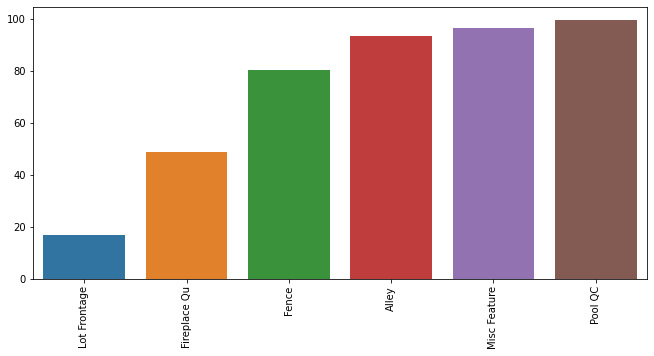

In [61]:
plt.figure(figsize=(11,5))
sns.barplot(x=perc_missing(df).index, y = perc_missing(df))
# plt.ylim(0,1)
plt.xticks(rotation=90);

now lets explore these columns which have a lot of missing data

In [62]:
print(f"Pool QC: counts:{df['Pool QC'].count()}, unique values:{df['Pool QC'].unique()}")
print(f"Misc Feature: counts:{df['Misc Feature'].count()}, unique values:{df['Misc Feature'].unique()}")
print(f"Alley: counts:{df['Alley'].count()}, unique values:{df['Alley'].unique()}")
print(f"Fence: counts:{df['Fence'].count()}, unique values:{df['Fence'].unique()}")
print(f"Fireplace Qu: counts:{df['Fireplace Qu'].count()}, unique values:{df['Fireplace Qu'].unique()}")
# print(f"Lot Frontage: counts:{df['Lot Frontage'].count()}, unique values:{df['Lot Frontage'].unique()}")

Pool QC: counts:12, unique values:[nan 'Ex' 'Gd' 'TA' 'Fa']
Misc Feature: counts:105, unique values:[nan 'Gar2' 'Shed' 'Othr' 'TenC']
Alley: counts:198, unique values:[nan 'Pave' 'Grvl']
Fence: counts:572, unique values:[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
Fireplace Qu: counts:1505, unique values:['Gd' nan 'TA' 'Po' 'Ex' 'Fa']


In [63]:
df.corr()['SalePrice'][df.corr()['SalePrice'].isin(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Lot Frontage'])]

Series([], Name: SalePrice, dtype: float64)

I think bcz of numerous missing data they have no correlatioan with Sale Price, So I'd rather drop those columns although they could be filled in with valid ***None*** value.  
So I'll drop four columns with more than 80% `nan` value

In [64]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

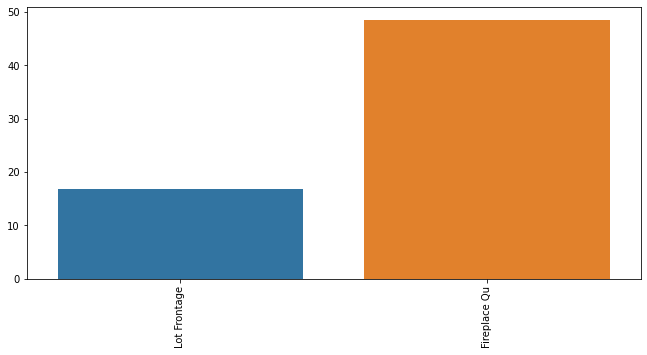

In [65]:
plt.figure(figsize=(11,5))
sns.barplot(x=perc_missing(df).index, y = perc_missing(df))
# plt.ylim(0,1)
plt.xticks(rotation=90);

Now for these two columns

> LotFrontage: Linear feet of street connected to property  

>FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [66]:
df[['Fireplace Qu', 'Fireplaces']].head()

,Fireplace Qu,Fireplaces
0,Gd,2
1,NaN,0
2,NaN,0
3,TA,2
4,TA,1


In [67]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

We should be smart with the `Lot Frontage` missing data

In [68]:
df[['Lot Shape', 'Lot Frontage', 'Lot Area', 'Lot Config']]

,Lot Shape,Lot Frontage,Lot Area,Lot Config
0,IR1,141.0,31770,Corner
1,Reg,80.0,11622,Inside
2,IR1,81.0,14267,Corner
3,Reg,93.0,11160,Corner
4,IR1,74.0,13830,Inside
...,...,...,...,...
2922,IR1,37.0,7937,CulDSac
2923,IR1,NaN,8885,Inside
2924,Reg,62.0,10441,Inside
2925,Reg,77.0,10010,Inside


### Imputation of Missing Data
From Wikipedia:
> In statistics, **imputation** is the process of replacing missing data with *substituted* values.  
When substituting for *a data point*, it is known as **"unit imputation"**; when substituting for *a component of a data point*, it is known as **"item imputation"**.

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.  
So we will use: `Neighborhood` and `Lot Frontage`
>Neighborhood: Physical locations within Ames city limits

>LotFrontage: Linear feet of street connected to property

[doc](https://scikit-learn.org/stable/modules/impute.html)

In [69]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [70]:
df.groupby('Neighborhood').agg({'Lot Frontage': ['count', 'mean']})

Lot Frontage           
                    count       mean
Neighborhood                        
Blmngtn                20  46.900000
Blueste                10  27.300000
BrDale                 30  21.500000
BrkSide                95  55.789474
ClearCr                20  88.150000
CollgCr               220  71.336364
Crawfor                83  69.951807
Edwards               175  64.794286
Gilbert               111  74.207207
Greens                  7  41.000000
GrnHill                 0        NaN
IDOTRR                 87  62.241379
Landmrk                 0        NaN
MeadowV                33  25.606061
Mitchel                90  75.144444
NAmes                 375  75.210667
NPkVill                21  28.142857
NWAmes                 85  81.517647
NoRidge                54  91.629630
NridgHt               163  84.184049
OldTown               229  61.777293
SWISU                  44  59.068182
Sawyer                 98  74.551020
SawyerW               106  70.669811
Somerst               162  64.549383
StoneBr                46  62.173913
Timber                 56  81.303571
Veenker                16  72.000000

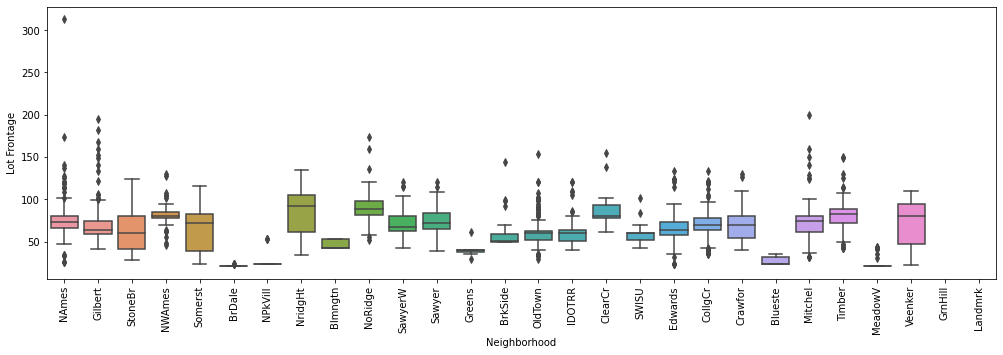

In [71]:
plt.figure(figsize=(17,5))
sns.boxplot(y='Lot Frontage',x='Neighborhood',data=df,orient='v')
plt.xticks(rotation=90);

#### Transform function
We can use `transform` function based on [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html)

In [72]:
# help(pd.DataFrame.transform)

In [73]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [74]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2926, dtype: float64

In [75]:
df[df['Lot Frontage'].isnull()].index

Int64Index([  11,   14,   22,   23,   24,   55,   57,   58,   74,   79,
            ...
            2842, 2856, 2868, 2889, 2890, 2891, 2894, 2895, 2909, 2923],
           dtype='int64', length=490)

In [76]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))

In [77]:
df.iloc[21:26][['Lot Frontage', 'Neighborhood']]

,Lot Frontage,Neighborhood
21,85.000000,NWAmes
22,64.549383,Somerst
23,75.210667,NAmes
24,75.210667,NAmes
25,65.000000,NAmes


What we have done here is that we fill nan values with the **average** of Lot Frontage in that neighborhood

In [78]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [79]:
df[df['Lot Frontage'].isnull()]['Neighborhood']

2253    GrnHill
2785    Landmrk
2889    GrnHill
Name: Neighborhood, dtype: object

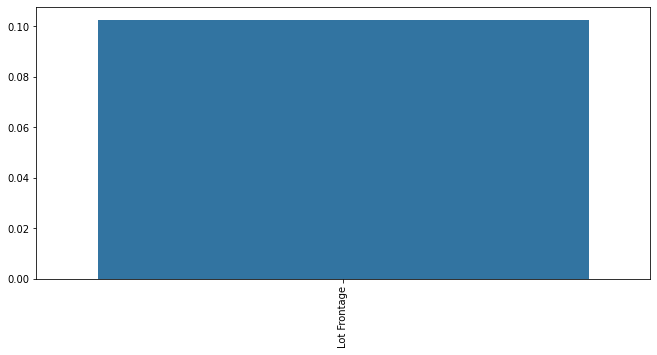

In [80]:
plt.figure(figsize=(11,5))
sns.barplot(x=perc_missing(df).index, y = perc_missing(df))
# plt.ylim(0,1)
plt.xticks(rotation=90);

We have no clue about those missing values. We can either delete those rows or fill in them with 0

In [81]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [82]:
df.isnull().sum().sort_values()

PID              0
Functional       0
TotRms AbvGrd    0
Kitchen Qual     0
Kitchen AbvGr    0
                ..
Exterior 1st     0
Roof Matl        0
Roof Style       0
Exter Cond       0
SalePrice        0
Length: 77, dtype: int64

We have no missing data now!!!! 😃

### saving data

In [83]:
df.to_csv('my_Ames_no_missing_data.csv', index=False)

------


# Dealing with Categorical Data

Many machine learning models can not deal with categorical data set as strings. For example linear regression can not apply a a Beta Coefficent to colors like "red" or "blue". Instead we need to convert these categories into "dummy" variables, otherwise known as "one-hot" encoding.

A pitfall in dealing with categorical data is [dummy variable trap](https://medium.com/analytics-vidhya/linear-regression-dummy-variable-trap-8964a83516d9). 

>The dummy variable trap is a scenario in which the independent variables become multicollinear after addition of dummy variables.

But lets now see how we can turn a Categorical data into a Numerical data with `get_dummies()` function.

In [84]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
  

To avoid *dummy variable trap* we use `drop_first=True`.

In [85]:
sample = pd.DataFrame({"A" : ['Female', 'Male','Female', 'Male', 'Male', 'Male','Female'], 
                      "B" : [1,1,0,1,0,0,0]})

In [86]:
pd.get_dummies(sample, drop_first=True, prefix=['A_col'], )

,B,A_col_Male
0,1,0
1,1,1
2,0,0
3,1,1
4,0,1
5,0,1
6,0,0


An important column in our dataset is MS SubClass, bcz  
    
    MSSubClass: Identifies the type of dwelling involved in the sale.    

        20    1-STORY 1946 & NEWER ALL STYLES
        30    1-STORY 1945 & OLDER
        40    1-STORY W/FINISHED ATTIC ALL AGES
        45    1-1/2 STORY - UNFINISHED ALL AGES
        50    1-1/2 STORY FINISHED ALL AGES
        60    2-STORY 1946 & NEWER
        70    2-STORY 1945 & OLDER
        75    2-1/2 STORY ALL AGES
        80    SPLIT OR MULTI-LEVEL
        85    SPLIT FOYER
        90    DUPLEX - ALL STYLES AND AGES
       120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150    1-1/2 STORY PUD - ALL AGES
       160    2-STORY PUD - 1946 & NEWER
       180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190    2 FAMILY CONVERSION - ALL STYLES AND AGES
       
We need to be careful when it comes to encoding categories as numbers. We want to make sure that the numerical relationship makes sense for a model.   

The number itself does not appear to have a relationship to the other numbers. While 30 > 20 is True, it doesn't really make sense that `"1-STORY 1945 & OLDER" > "1-STORY 1946 & NEWER ALL STYLES"`. Keep in mind, this isn't always the case, for example 1st class seats versus 2nd class seats encoded as 1 and 2.

In [87]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [88]:
cols = df.select_dtypes(include='object').columns

In [89]:
df = pd.get_dummies(df, columns=cols, drop_first=True)

Because we must at least have one unique column for each row, we can either have both indexes and PID, or get rid of one of them.

In [90]:
df = df.drop('PID', axis=1)

### Saving final dataset

In [91]:
df.to_csv('my_final_Ames_data.csv')

---